In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

predictions_path = r"../predictions.csv"
dataset_path = r"../../data/dataset_direction.csv"

In [223]:
# Metadata
df1 = pd.read_csv(dataset_path, encoding='latin-1')
#df1.head()

In [224]:
# Predictions
df2 = pd.read_csv(predictions_path, encoding='utf-8')
#df2.head()

In [225]:
# Metadata and predictions combined,
df = df1.merge(df2, left_on='dir_filename', right_on='filename')
df.head()

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,p1477,p1478,p1479,p1480,support_exact,query_exact,correct_exact,support_exact_at_correct,rank,y
0,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,382,799,261,261,421429_l_2,201506_l_2,201506_l_1,201506_l_1,16,1
1,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,516,603,623,402,421533_r_1,201506_r_2,201506_r_1,201506_r_1,4,0
2,202037,7355.0,grÃ¸nngylt,120.0,m,0.0,1.0,_1160,801,802.0,...,757,757,739,739,202037_r_2,202037_r_1,202037_r_2,202037_r_2,1,4
3,204295,12011.0,grÃ¸nngylt,149.0,m,0.0,1.0,P906,1023,1024.0,...,940,788,788,940,422268_r_2,204295_r_2,204295_r_1,204295_r_1,50,6
4,209127,25103.0,grÃ¸nngylt,181.0,f,2.0,1.0,P629,3672,3673.0,...,838,827,18,205,420868_r_2,209127_r_1,209127_r_2,209127_r_2,38,10


In [226]:
# Gets the amount of image pairs grouped by period difference

def get_pit_dir(filename):
    """Transforms filename into a tag that contains both pit and direction."""
    basename = os.path.basename(filename)
    pit_dir = "_".join(basename.split("_")[:-1])
    return basename, pit_dir

df_f3 = df1[~df1['Period'].isin(["0", "May", "Oct"])]
df_f3 = df_f3[df_f3['dir_filename'].str.len() > 0]

a = []
b = []
dist = []

for i, row in df_f3.iterrows():
    basename, pit_dir = get_pit_dir(row["dir_filename"])

    if basename in a + b:
        continue

    pit = row["pit"]
    period = float(row["Period"].replace(',', '.'))
    df_sub = df_f3[df_f3["pit"] == pit]

    for i2, row2 in df_sub.iterrows():
        basename2, pit_dir2 = get_pit_dir(row2["dir_filename"])
        if pit_dir2 != pit_dir:
            continue
        if basename == basename2:
            continue
        period2 = float(row2["Period"].replace(',', '.'))
        diff = abs(period - period2)

        a.append(basename)
        b.append(basename2)
        dist.append(diff)

result = np.column_stack([a, b, dist])
unique_total, counts_total = np.unique(result[:,2], return_counts=True)
unique_total = unique_total.astype(np.float)
dict(zip(unique_total, counts_total))

{0.0: 181,
 0.5: 90,
 1.0: 194,
 1.5: 32,
 2.0: 75,
 3.0: 3,
 5.0: 34,
 6.0: 43,
 6.5: 21,
 7.0: 45,
 7.5: 8,
 8.0: 8,
 8.5: 14}

In [227]:
# Filter correct on first try

df_f = df.copy() #df[df["rank"] == 1]
df_f.head()

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,p1477,p1478,p1479,p1480,support_exact,query_exact,correct_exact,support_exact_at_correct,rank,y
0,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,382,799,261,261,421429_l_2,201506_l_2,201506_l_1,201506_l_1,16,1
1,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,516,603,623,402,421533_r_1,201506_r_2,201506_r_1,201506_r_1,4,0
2,202037,7355.0,grÃ¸nngylt,120.0,m,0.0,1.0,_1160,801,802.0,...,757,757,739,739,202037_r_2,202037_r_1,202037_r_2,202037_r_2,1,4
3,204295,12011.0,grÃ¸nngylt,149.0,m,0.0,1.0,P906,1023,1024.0,...,940,788,788,940,422268_r_2,204295_r_2,204295_r_1,204295_r_1,50,6
4,209127,25103.0,grÃ¸nngylt,181.0,f,2.0,1.0,P629,3672,3673.0,...,838,827,18,205,420868_r_2,209127_r_1,209127_r_2,209127_r_2,38,10


In [228]:
# Gets the period for each image

def find_period_support(row):
    filename = row["support_exact"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


def find_period_query(row):
    filename = row["query_exact"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


def find_period_correct(row):
    filename = row["correct_exact"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


def find_period_support_at_correct(row):
    filename = row["support_exact_at_correct"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


df_f["period_query"] = df_f.apply(find_period_query, axis=1)
df_f["period_support"] = df_f.apply(find_period_support, axis=1)
df_f["period_correct"] = df_f.apply(find_period_correct, axis=1)
df_f["period_support_at_correct"] = df_f.apply(find_period_support_at_correct, axis=1)

df_f

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,support_exact,query_exact,correct_exact,support_exact_at_correct,rank,y,period_query,period_support,period_correct,period_support_at_correct
0,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,421429_l_2,201506_l_2,201506_l_1,201506_l_1,16,1,May,May,Oct,Oct
1,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,421533_r_1,201506_r_2,201506_r_1,201506_r_1,4,0,May,May,Oct,Oct
2,202037,7355.0,grÃ¸nngylt,120.0,m,0.0,1.0,_1160,801,802.0,...,202037_r_2,202037_r_1,202037_r_2,202037_r_2,1,4,2,3,3,3
3,204295,12011.0,grÃ¸nngylt,149.0,m,0.0,1.0,P906,1023,1024.0,...,422268_r_2,204295_r_2,204295_r_1,204295_r_1,50,6,4,4,3,3
4,209127,25103.0,grÃ¸nngylt,181.0,f,2.0,1.0,P629,3672,3673.0,...,420868_r_2,209127_r_1,209127_r_2,209127_r_2,38,10,10,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,434580,NaN,GrÃ¸nngylt,163.0,m,NaN,NaN,P820000,2,3.0,...,434580_r_2,434580_r_3,434580_r_2,434580_r_2,1,857,0,0,0,0
460,434125,NaN,GrÃ¸nngylt,122.0,f,NaN,NaN,P820000,4,5.0,...,434125_r_1,434125_r_2,434125_r_1,434125_r_1,1,849,0,0,0,0
461,434125,NaN,GrÃ¸nngylt,122.0,f,NaN,NaN,P820000,4,5.0,...,434046_r_2,434125_r_3,434125_r_1,434125_r_1,2,849,0,0,0,0
462,426276,NaN,GrÃ¸nngylt,172.0,f,NaN,NaN,P82400,53,NaN,...,426276_r_3,426276_r_4,426276_r_3,426276_r_3,1,570,0,0,0,0


In [229]:
# Filter out non-numeric periods and calculate difference

df_f2 = df_f[~df_f['period_query'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_correct'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support_at_correct'].isin(["0", "May", "Oct"])]

df_f2["period_query"] = df_f2["period_query"].str.replace(',', '.')
df_f2["period_support"] = df_f2["period_support"].str.replace(',', '.')
df_f2["period_correct"] = df_f2["period_correct"].str.replace(',', '.')
df_f2["period_support_at_correct"] = df_f2["period_support_at_correct"].str.replace(',', '.')

df_f2 = df_f2.astype({"period_query": float, "period_support": float, "period_correct": float, "period_support_at_correct": float})


def rank1_difference(row):
    if row["rank"] <= 1:
        return np.abs(row["period_query"] - row["period_support"])
    else:
        return np.NaN


def rank5_difference(row):
    if row["rank"] <= 5:
        return np.abs(row["period_query"] - row["period_support_at_correct"])
    else:
        return np.NaN


df_f2["period_difference"] = df_f2.apply(rank1_difference, axis=1)
df_f2["period_difference_5"] = df_f2.apply(rank5_difference, axis=1)
df_f2["correct_difference"] = np.abs(df_f2["period_query"] - df_f2["period_correct"])

df_f2

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,support_exact_at_correct,rank,y,period_query,period_support,period_correct,period_support_at_correct,period_difference,period_difference_5,correct_difference
2,202037,7355.0,grÃ¸nngylt,120.0,m,0.0,1.0,_1160,801,802.0,...,202037_r_2,1,4,2.0,3.0,3.0,3.0,1.0,1.0,1.0
3,204295,12011.0,grÃ¸nngylt,149.0,m,0.0,1.0,P906,1023,1024.0,...,204295_r_1,50,6,4.0,4.0,3.0,3.0,NaN,NaN,1.0
4,209127,25103.0,grÃ¸nngylt,181.0,f,2.0,1.0,P629,3672,3673.0,...,209127_r_2,38,10,10.0,4.0,4.0,4.0,NaN,NaN,6.0
5,209127,11814.0,grÃ¸nngylt,170.0,f,0.0,1.0,P9050,843,844.0,...,209127_l_1,2,9,4.0,4.0,10.0,10.0,NaN,6.0,6.0
6,209526,128.0,grÃ¸nngylt,130.0,f,1.0,1.0,P5300,345,346.0,...,209526_l_1,6,13,2.5,3.0,10.0,10.0,NaN,NaN,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,67201,185.0,grÃ¸nngylt,133.0,s,2.0,1.0,P5300,414,415.0,...,67201_l_3,3,997,2.5,10.0,2.0,2.0,NaN,0.5,0.5
446,67201,7519.0,grÃ¸nngylt,133.0,s,0.0,1.0,_1160,996,997.0,...,67201_l_3,1,997,2.0,2.0,2.0,2.0,0.0,0.0,0.0
447,67510,28129.0,grÃ¸nngylt,163.0,f,0.0,1.0,P831,6210,6211.0,...,67510_l_2,21,999,11.0,2.0,2.5,2.5,NaN,NaN,8.5
448,67510,28129.0,grÃ¸nngylt,163.0,f,0.0,1.0,P831,6210,6211.0,...,67510_r_2,6,1000,11.0,3.0,2.5,2.5,NaN,NaN,8.5


In [230]:
count_correct = df_f2.groupby("correct_difference").y.nunique()
count_correct

correct_difference
0.0    71
0.5    31
1.0    81
1.5     9
2.0    29
3.0     1
5.0    12
6.0    15
6.5     6
7.0    17
7.5     2
8.0     4
8.5     3
Name: y, dtype: int64

In [231]:
# Group by period intervals

count_guess = df_f2.groupby("period_difference").y.nunique()
for u in count_correct.index:
    if u not in count_guess.index:
        count_guess[u] = 0
count_guess = count_guess.sort_index()
guesses = count_guess.to_numpy()
count_guess

period_difference
0.0    45
0.5    13
1.0    33
1.5     2
2.0     8
3.0     0
5.0     1
6.0     1
6.5     3
7.0     2
7.5     1
8.0     1
8.5     0
Name: y, dtype: int64

In [232]:
# Group by period intervals, given 5 tries

count_guess_5 = df_f2.groupby("period_difference_5").y.nunique()
for u in count_correct.index:
    if u not in count_guess_5.index:
        count_guess_5[u] = 0
count_guess_5 = count_guess_5.sort_index()
guesses_5 = count_guess_5.to_numpy()
count_guess_5

period_difference_5
0.0    60
0.5    22
1.0    50
1.5     3
2.0    12
3.0     0
5.0     1
6.0     3
6.5     3
7.0     4
7.5     1
8.0     1
8.5     0
Name: y, dtype: int64

In [233]:
# Table of  correct guesses and total guesses

df_overview = pd.DataFrame(np.column_stack([count_correct.index, count_correct.to_numpy(), guesses, guesses_5]), columns=["periode forskjell", "totalt mulige", "riktig på første", "riktig på femte"])
df_overview = df_overview.set_index("periode forskjell")
df_overview.insert(2, "andel", df_overview.apply(lambda row: row["riktig på første"] / row["totalt mulige"], axis=1).round(2))
df_overview["andel@5"] = df_overview.apply(lambda row: row["riktig på femte"] / row["totalt mulige"], axis=1).round(2)
df_overview["totalt mulige"] = df_overview["totalt mulige"].astype(int)
df_overview["riktig på første"] = df_overview["riktig på første"].astype(int)
df_overview["riktig på femte"] = df_overview["riktig på femte"].astype(int)
df_overview

,totalt mulige,riktig på første,andel,riktig på femte,andel@5
periode forskjell,,,,,
0.0,71,45,0.63,60,0.85
0.5,31,13,0.42,22,0.71
1.0,81,33,0.41,50,0.62
1.5,9,2,0.22,3,0.33
2.0,29,8,0.28,12,0.41
3.0,1,0,0.00,0,0.00
5.0,12,1,0.08,1,0.08
6.0,15,1,0.07,3,0.20
6.5,6,3,0.50,3,0.50


In [234]:
acc_1 = df_overview["riktig på første"].sum() / df_overview["totalt mulige"].sum()
acc_5 = df_overview["riktig på femte"].sum() / df_overview["totalt mulige"].sum()
print(acc_1, acc_5)

0.3914590747330961 0.5693950177935944


In [235]:
# Table of database distribution

df_distribution = pd.DataFrame(np.column_stack([unique_total, counts_total]), columns=["periode forskjell", "total i datasett"])
df_distribution = df_distribution.set_index("periode forskjell")
df_distribution["total i datasett"] = df_distribution["total i datasett"].astype(int)
df_distribution

,total i datasett
periode forskjell,
0.0,181
0.5,90
1.0,194
1.5,32
2.0,75
3.0,3
5.0,34
6.0,43
6.5,21


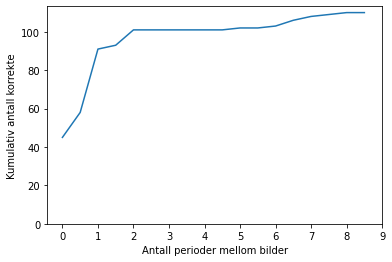

In [236]:
# Plotting the cumulative number of correct given period intervals

x = np.arange(0, 9, 0.5)

count_guess_full = count_guess.copy()
for u in x:
    if u not in count_guess_full.index:
        count_guess_full[u] = 0
count_guess_full = count_guess_full.sort_index()
guess_cum = np.cumsum(count_guess_full.to_numpy())

count_guess_5_full = count_guess_5.copy()
for u in x:
    if u not in count_guess_5_full.index:
        count_guess_5_full[u] = 0
count_guess_5_full = count_guess_5_full.sort_index()
guess_5_cum = np.cumsum(count_guess_5_full.to_numpy())

count_correct_full = count_correct.copy()
for u in x:
    if u not in count_correct_full.index:
        count_correct_full[u] = 0
count_correct_full = count_correct_full.sort_index()
correct_cum = np.cumsum(count_correct_full.to_numpy())

#plt.plot(unique, total_cum)
plt.plot(x, guess_cum)
#plt.plot(x, guess_5_cum)
plt.xlabel("Antall perioder mellom bilder")
plt.ylabel("Kumulativ antall korrekte")
plt.ylim(bottom=0)
plt.xscale("linear")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig("fig.png")
plt.show()